# Part I - (Ford Go Bike)
## by (Fuhad Olatoyan)

## Introduction
> In this investigation we'll be taking a look at the data for Ford's GoBike program, with the data kindly provided to us by Ford themselves. Transparently, there aren't a ton of quantitative fields in this dataset, so we'll do our best to make the most of it

### Dataset Overview
The dataset(s) provided to us by Ford contain the following fields:
<ul style=“list-style-type:square”>
    
<li>Trip Duration (in seconds)</li>
<li>Start Time and Date</li>
<li>End Time and Date</li>
<li>Start Station ID</li>
<li>Start Station Name</li>
<li>Start Station Latitude</li>
<li>Start Station Longitude</li>
<li>End Station ID</li>
<li>End Station Name</li>
<li>End Station Latitude</li>
<li>End Station Longitude</li>
<li>Bike ID</li>
<li>User Type (Subscriber or Customer - "Subscriber" = Member or "Customer" = Casual)</li>
<li>Member Year of Birth</li>
<li>Member Gender</li>
</ul>

## Preliminary Wrangling

In [1]:
#import all packages and set plots to be embedded inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Loading the dataset.

In [2]:
ford_go_bike=pd.read_csv('c:Downloads/201902-fordgobike-tripdata.csv')
ford_go_bike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
ford_go_bike.shape

(183412, 16)

The dataset contain __183412__ rows and __16__ columns

#####  Information i.e _(brief details with the dataset)_
Using the __info()__ function


In [4]:
ford_go_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

##### Checking for NULL values 
using the __isnull__ function

In [5]:
ford_go_bike.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

From observation the following columns contain __NULL__ values:

> start_station_id __197__,
> start_station_name __197__,
> member_birth_year __8265__ and 
> member_gender __8265__

### DATA WRANGLING

Treating the missing values for __member_birth_year__ 

In [6]:
mean_value = ford_go_bike['member_birth_year'].mean()
print(mean_value)

ford_go_bike['member_birth_year'].fillna(mean_value, inplace=True)

1984.8064368787361


After replacing the null values with the mean(value at average) __1984.80643688__

Dropping __('end_station_id','end_station_name','member_gender')__ columns because NULL values are still present in them.

In [7]:
ford_go_bike.dropna(subset=['end_station_id','end_station_name','member_gender'], inplace=True)


Testing to know if our dataset doesn't have NULL values

In [8]:
ford_go_bike.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

Handling the data types

In [9]:
ford_go_bike['start_time'] = pd.to_datetime(ford_go_bike['start_time'])
ford_go_bike['end_time'] = pd.to_datetime(ford_go_bike['end_time'])
ford_go_bike['start_station_id'] = ford_go_bike['start_station_id'].astype(str)
ford_go_bike['end_station_id'] = ford_go_bike['end_station_id'].astype(str)
ford_go_bike['bike_id'] = ford_go_bike['bike_id'].astype(str)
ford_go_bike['member_birth_year'] = ford_go_bike['member_birth_year'].astype(int)
ford_go_bike.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                   object
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                     object
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                            object
user_type                          object
member_birth_year                   int32
member_gender                      object
bike_share_for_all_trip            object
dtype: object

Improving the data intergrity using the right dtypes
> start_time as __DateTime__,
> end_time as __DateTime__,
> start_station_id as __String__,
> end_station_id as __String__,
> bike_id as __String__ and 
> member_birth_year as __Int__

Adding more columns to the dataset to help with __Time Intelligence Analysis__ which was extracted from __start_time__ columns

In [10]:
ford_go_bike["year"] = ford_go_bike["start_time"].dt.year
ford_go_bike["month"] = ford_go_bike["start_time"].dt.month_name()
ford_go_bike["day"] = ford_go_bike["start_time"].dt.strftime("%a")

In [11]:
ford_go_bike['start_time_hour'] = ford_go_bike['start_time'].dt.hour
ford_go_bike['end_time_hour'] = ford_go_bike['end_time'].dt.hour

In [12]:
ford_go_bike[['start_time_hour','end_time_hour']].head(5)

,start_time_hour,end_time_hour
0,17,8
2,12,5
3,17,4
4,23,0
5,23,0


Year(1993), Month(Feb) and Days Of the Week(Monday)

In [13]:
ford_go_bike[['year','month','day']].head()

,year,month,day
0,2019,February,Thu
2,2019,February,Thu
3,2019,February,Thu
4,2019,February,Thu
5,2019,February,Thu


Create a new column, __age_group__ to classify the member_birth_year

In [14]:
bins= [1878,1922,1972,1986,2001,2022]
labels = ['very_young','young','midlife','old','very_old']
ford_go_bike['age_group'] = pd.cut(ford_go_bike['member_birth_year'], bins=bins, labels=labels, right=False)

In [15]:
ford_go_bike[['age_group']].head()

,age_group
0,midlife
2,midlife
3,old
4,midlife
5,young


>age_group added to the columns

Getting the ages of the members  to a column __Age__ and convert it to integer 

In [16]:
ford_go_bike['Age'] = 2022 - ford_go_bike['member_birth_year']
ford_go_bike['Age'] = ford_go_bike['Age'].astype(int)

In [17]:
ford_go_bike.Age.describe(percentiles = [.99])

count    174952.000000
mean         37.196865
std          10.118731
min          21.000000
50%          35.000000
99%          67.000000
max         144.000000
Name: Age, dtype: float64

In [18]:
ford_go_bike[['Age']].head(5)

,Age
0,38
2,50
3,33
4,48
5,63


In [19]:
ford_go_bike = ford_go_bike.query('Age <= 66')

Value counts for __start_station_id__

In [20]:
ford_go_bike['start_station_id'].value_counts().head(5)

58.0    3631
67.0    3347
81.0    2906
21.0    2689
3.0     2597
Name: start_station_id, dtype: int64

>start_name_id 58 had the highest number of occurance

Value counts for __start_station_name__

In [21]:
ford_go_bike['start_station_name'].value_counts().head(5)

Market St at 10th St                                         3631
San Francisco Caltrain Station 2  (Townsend St at 4th St)    3347
Berry St at 4th St                                           2906
Montgomery St BART Station (Market St at 2nd St)             2689
Powell St BART Station (Market St at 4th St)                 2597
Name: start_station_name, dtype: int64

>start_station name __Market St at 10th St__ has the highest number of bikers taking off

Value counts for __end_station_id__

In [22]:
ford_go_bike['end_station_id'].value_counts().head(5)

67.0    4586
58.0    3680
21.0    3414
15.0    3099
3.0     2833
Name: end_station_id, dtype: int64

> end_station_id 67 has the highest number of  bikers occurance

Value counts for __end_station_name__

In [23]:
ford_go_bike['end_station_name'].value_counts().head(5)

San Francisco Caltrain Station 2  (Townsend St at 4th St)    4586
Market St at 10th St                                         3680
Montgomery St BART Station (Market St at 2nd St)             3414
San Francisco Ferry Building (Harry Bridges Plaza)           3099
Powell St BART Station (Market St at 4th St)                 2833
Name: end_station_name, dtype: int64

>__San Francisco Caltrain Satation 2__ has the highest number of bikers that end there ride at the station

Value counts for __member_birth_year__

In [24]:
ford_go_bike['member_birth_year'].value_counts().head(5)

1988    10214
1993     9323
1989     8967
1990     8640
1991     8484
Name: member_birth_year, dtype: int64

> Most bikers are within the age range __1991-1988__

Value counts for __member_gender__

In [25]:
ford_go_bike['member_gender'].value_counts().head()

Male      129001
Female     40540
Other       3597
Name: member_gender, dtype: int64

>Over 65% of bikers are __Male__

##### Checking if there's duplicate rows in the dataset

In [26]:
ford_go_bike.duplicated().sum()

0

> Zero shows no duplicate

__Name and number__ of columns we have in the dataset 

In [27]:
for columns,column_names in enumerate(ford_go_bike):
    print(columns+1,column_names)

1 duration_sec
2 start_time
3 end_time
4 start_station_id
5 start_station_name
6 start_station_latitude
7 start_station_longitude
8 end_station_id
9 end_station_name
10 end_station_latitude
11 end_station_longitude
12 bike_id
13 user_type
14 member_birth_year
15 member_gender
16 bike_share_for_all_trip
17 year
18 month
19 day
20 start_time_hour
21 end_time_hour
22 age_group
23 Age


### EXPLORATORY ANALYSIS

In [28]:
ford_go_bike.describe()

,duration_sec,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,member_birth_year,year,start_time_hour,end_time_hour,Age
count,173138.000000,173138.000000,173138.000000,173138.000000,173138.000000,173138.000000,173138.0,173138.000000,173138.000000,173138.000000
mean,703.894217,37.771057,-122.351645,37.771254,-122.351216,1985.195099,2019.0,13.463359,13.616196,36.804901
std,1647.868715,0.100702,0.118021,0.100607,0.117580,9.344406,0.0,4.740127,4.754079,9.344406
min,61.000000,37.317298,-122.453704,37.317298,-122.453704,1956.000000,2019.0,0.000000,0.000000,21.000000
25%,323.000000,37.770407,-122.411901,37.770407,-122.411647,1980.000000,2019.0,9.000000,9.000000,30.000000
50%,510.000000,37.780760,-122.398279,37.781010,-122.397437,1987.000000,2019.0,14.000000,14.000000,35.000000
75%,788.000000,37.797320,-122.283093,37.797673,-122.286533,1992.000000,2019.0,17.000000,18.000000,42.000000
max,84548.000000,37.880222,-121.874119,37.880222,-121.874119,2001.000000,2019.0,23.000000,23.000000,66.000000


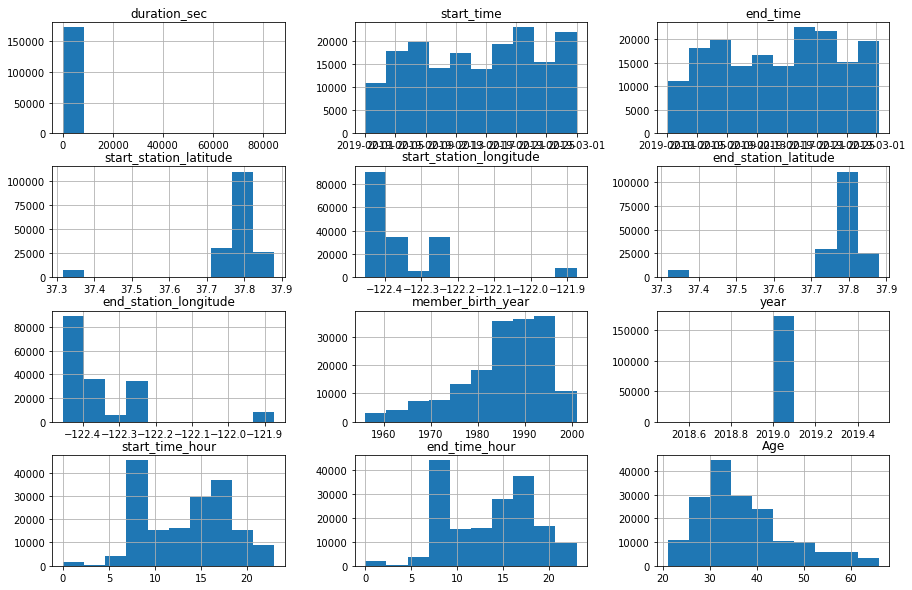

In [29]:
ford_go_bike.hist(figsize=(15,10));

In [30]:
ford_go_bike.skew()

C:\Users\taj451\AppData\Local\Temp\ipykernel_8784\3444791237.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  ford_go_bike.skew()


duration_sec               28.459491
start_station_id            0.668442
start_station_latitude     -3.623302
start_station_longitude     2.753362
end_station_id              0.684554
end_station_latitude       -3.638309
end_station_longitude       2.777889
bike_id                    -1.088357
member_birth_year          -0.936745
year                        0.000000
start_time_hour            -0.152248
end_time_hour              -0.178166
Age                         0.936745
dtype: float64

###  What is the structure of your dataset

There are 183412 fordgobike trips in the dataset with 16 specifications (duration_sec, start_time, end_time, start_station_id, start_station_name, start_station_latitude, start_station_longitude, end_station_id, end_station_name, end_station_latitude ,end_station_longitude, bike_id, user_type, member_birth_year, member_gender, bike_share_for_all_trip). Out of 16 specifications 9 are numerical, 2 are datetime, 4 are object type and 1 is boolean type

### What is/are the main feature(s) of interest in your dataset?

I'm most interested in figuring out the days of the week that has the highest bike ride, furthermore will like to know the  relationship between the duration of the ride and the gender of the rider and also the relationship between the duration of the ride and the age group of the rider.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

Looking at all the features in the dataset. It is why i dropped all NULL values leaving what i consider to the important ones for investigation.



###### Creating a function to reduce the lines of code and make the work more tidy 

In [31]:
def label(x,y,t):
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(t)
    plt.show()

## Univariate Exploration

> In this section, we'll be investigating distributions of individual variables. Also detect unusual points or outliers, take a deeper look to clean things up and prepare the dataset to look at relationships between variables.

Using a __Barchart__ to visualize variable count in the age_group columns 
<ol>
<li>Determining if the distribution is skewed or symmetric?</li>
<li>Is it unimodal or multimodal?</li>
</ol>


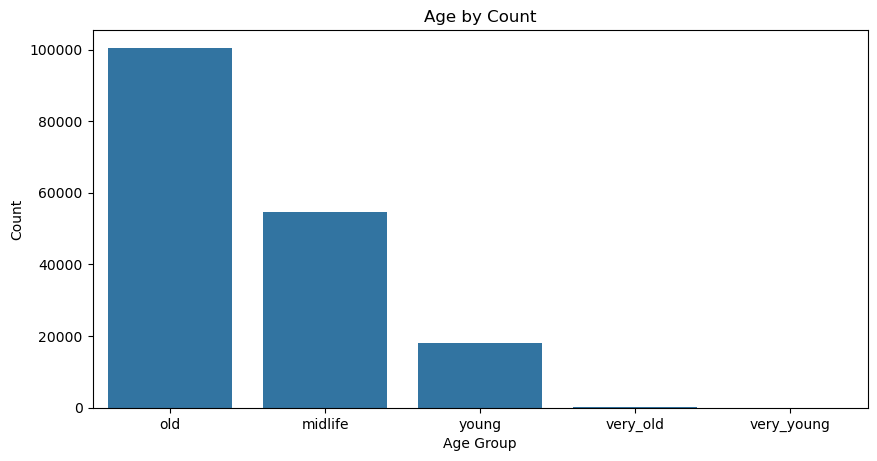

In [32]:
plt.figure(figsize = (10,5), dpi = 100)
base_color=sns.color_palette()[0]
gen_index= ford_go_bike['age_group'].value_counts().index
sns.countplot(data=ford_go_bike,x="age_group",color= base_color,order=gen_index)
label("Age Group","Count","Age by Count")

Merging __categorical columns__ together to get an idea of each ordinal variable's distribution

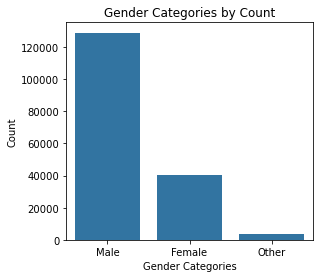

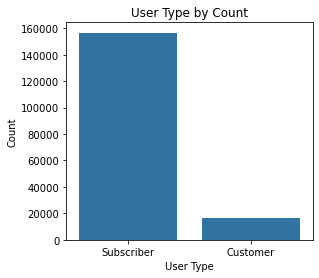

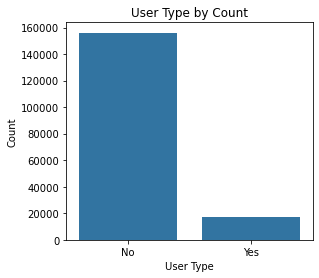

In [33]:
plt.figure(figsize=[15,4])
plt.subplot(1,3,1)
base_color=sns.color_palette()[0]
gen_index= ford_go_bike['member_gender'].value_counts().index
sns.countplot(data=ford_go_bike, x="member_gender", color= base_color, order=gen_index)
label("Gender Categories","Count","Gender Categories by Count") 

plt.figure(figsize=[15,4])
plt.subplot(1,3,2)
base_color=sns.color_palette()[0]
gen_index= ford_go_bike['user_type'].value_counts().index
sns.countplot(data=ford_go_bike,x="user_type",color= base_color,order=gen_index)
label("User Type","Count","User Type by Count")


plt.figure(figsize=[15,4])
plt.subplot(1,3,3)
base_color=sns.color_palette()[0]
gen_index= ford_go_bike['bike_share_for_all_trip'].value_counts().index
sns.countplot(data=ford_go_bike,x="bike_share_for_all_trip",color= base_color,order=gen_index)
label("User Type","Count","User Type by Count")  ;

<ol>
<li>We can see that males are the highest gender in useing the bike</li>
<li>Subscriber count are more than the customers</li> 
<li> High number of users didnt share the bike while on trip</li>
</ol>

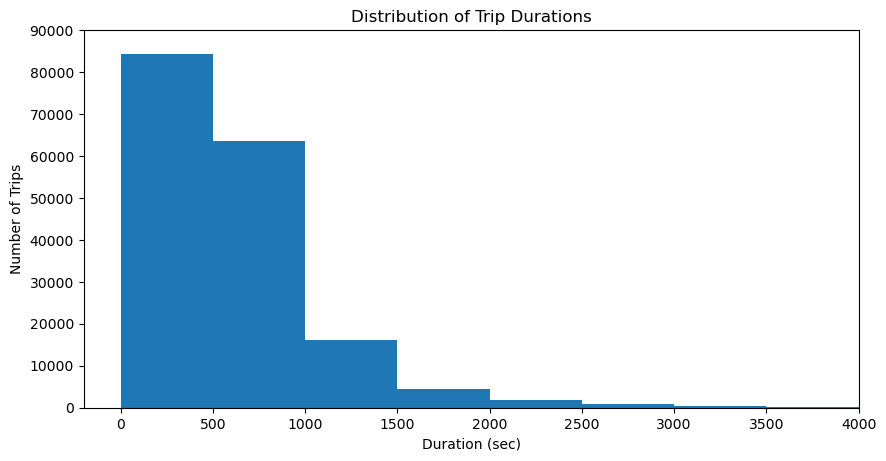

In [34]:
binsize = 500
bins = np.arange(0, ford_go_bike['duration_sec'].max()+binsize, binsize)

plt.figure(figsize = (10,5), dpi = 100)
plt.hist(data = ford_go_bike, x = 'duration_sec', bins = bins)
plt.axis([-200, 4000, 0, 90000])
label("Duration (sec)","Number of Trips","Distribution of Trip Durations")

>The distribution is rightly skewed

In [35]:
ford_go_bike['duration_min'] = ford_go_bike['duration_sec'] / 60

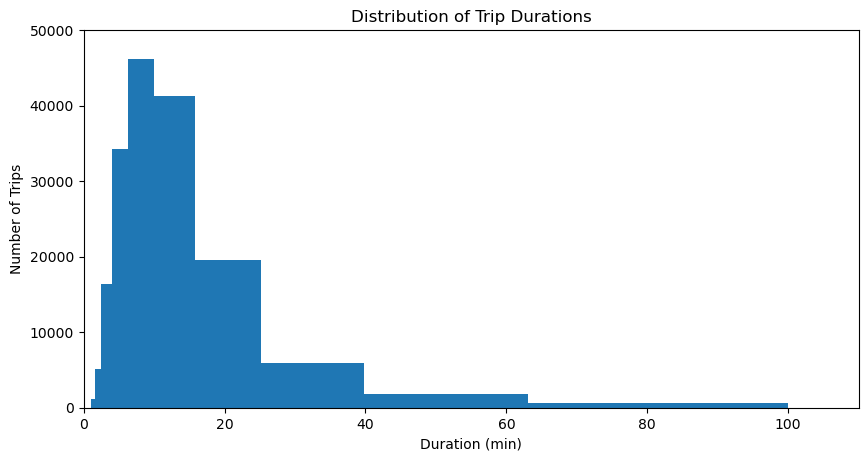

In [36]:
bins = 10 ** np.arange(0, 2+0.1, 0.2)

plt.figure(figsize = (10,5), dpi = 100)
plt.hist(data = ford_go_bike, x = 'duration_min', bins = bins)
plt.axis([0, 110, 0, 50000])
label("Duration (min)","Number of Trips","Distribution of Trip Durations")

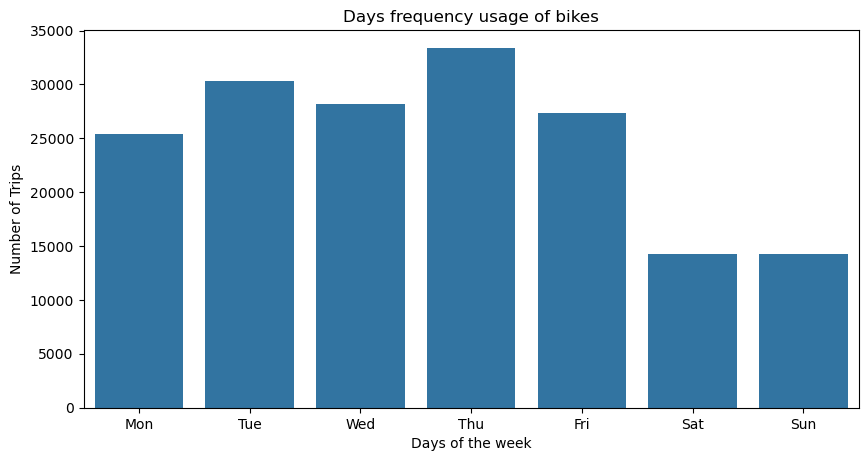

In [37]:
ford_go_bike['day'] = pd.Categorical(ford_go_bike['day'], categories=
    ['Mon','Tue','Wed','Thu','Fri','Sat', 'Sun'],
    ordered=True)
plt.figure(figsize = (10,5), dpi = 100)
base_color=sns.color_palette()[0]
sns.countplot(data=ford_go_bike,x="day",color= base_color)
label("Days of the week","Number of Trips",'Days frequency usage of bikes');

>we can notice that most of the bike riders are using the bikes for a short period of time approximately ranging from 10 to 15 minutes

In [38]:
ford_go_bike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,member_gender,bike_share_for_all_trip,year,month,day,start_time_hour,end_time_hour,age_group,Age,duration_min
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,Male,No,2019,February,Thu,17,8,midlife,38,869.750000
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,Male,No,2019,February,Thu,12,5,midlife,50,1030.900000
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,Other,No,2019,February,Thu,17,4,old,33,608.166667
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,Male,Yes,2019,February,Thu,23,0,midlife,48,26.416667
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,...,Male,No,2019,February,Thu,23,0,young,63,29.883333


### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> As stated earlier, from the different plots we can see that majority of the users of the rideshare are in the midlife and old ages. there is a moderate amount of users who are young with very little amount of them very young and very old. As for their genders, most of the users are male with less than half of them females and very little amount of them with undisclosed genders. A significantly major part of the users are subscribers with very little amount of them falling into the customer category. There didn't seem to be any unusual points, therefore there was no need for any transformations.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The distribution of the trip duration was a little surprising at first plotting out the original dataو Nothing seems out of the normal.

## Bivariate Exploration

> Investigating relationships between pairs of variables in the dataset. Most variables covered here have been introduced in previous section (univariate exploration).

Variable check on member birth and usertype

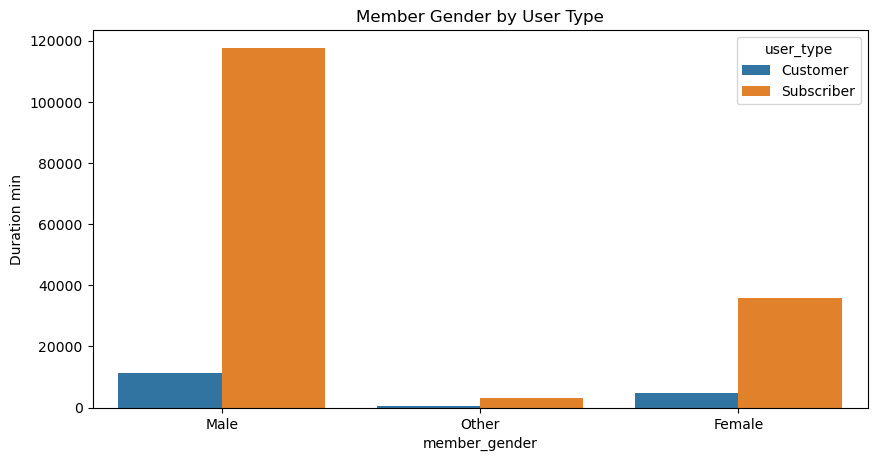

''

In [39]:
plt.figure(figsize = (10,5), dpi = 100)
Bivariate = sns.countplot(x="member_gender", hue="user_type",data=ford_go_bike)
label("member_gender","Duration min","Member Gender by User Type")
;

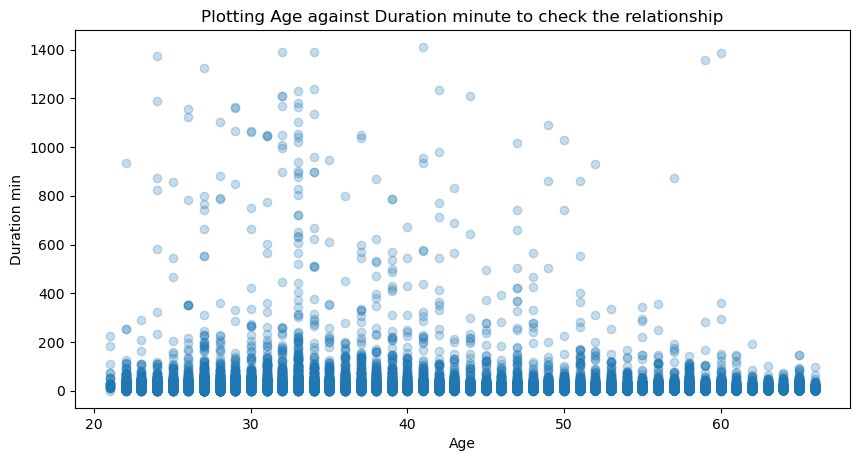

In [40]:
plt.figure(figsize = (10,5), dpi = 100)
plt.scatter(x=ford_go_bike["Age"], y=ford_go_bike["duration_min"],alpha=5/20)
label("Age","Duration min","Plotting Age against Duration minute to check the relationship");

In [41]:
featured = [ 'age_group' ]

for feature in featured:
    ford_go_bike[f"{feature}_cat"] =ford_go_bike[feature].astype('category')
    ford_go_bike[f"{feature}_cat"] = ford_go_bike[f"{feature}_cat"].cat.codes

In [42]:
numeric_vars = ['duration_sec', 'age_group_cat']
categoric_vars = ['user_type', 'member_gender', 'age_group']

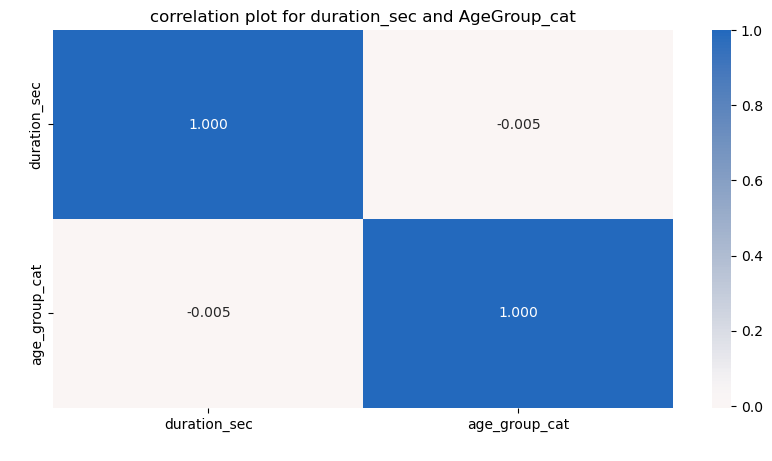

In [43]:
plt.figure(figsize = (10,5), dpi = 100)
sns.heatmap(ford_go_bike[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
label(" "," ","correlation plot for duration_sec and AgeGroup_cat")


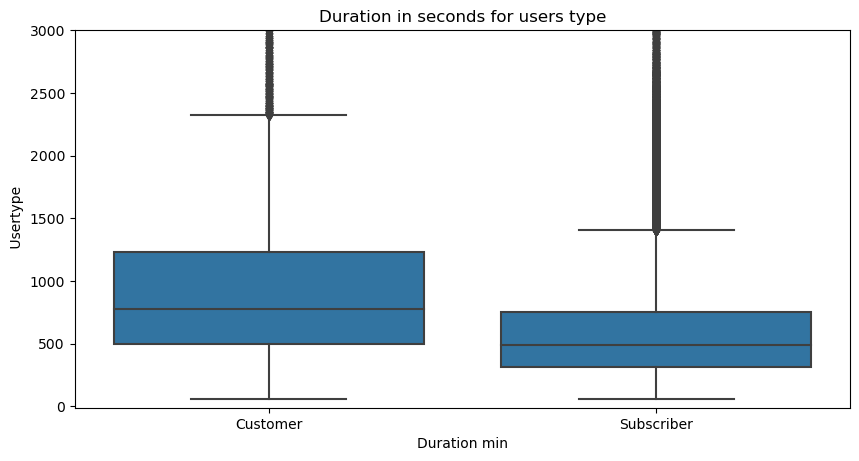

In [44]:
plt.figure(figsize = (10,5), dpi = 100)
base_color = sns.color_palette()[0]
sns.boxplot(data = ford_go_bike, x = 'user_type', y = 'duration_sec', color = base_color)
plt.ylim([-10, 3000])
label("Duration min"," Usertype","Duration in seconds for users type");

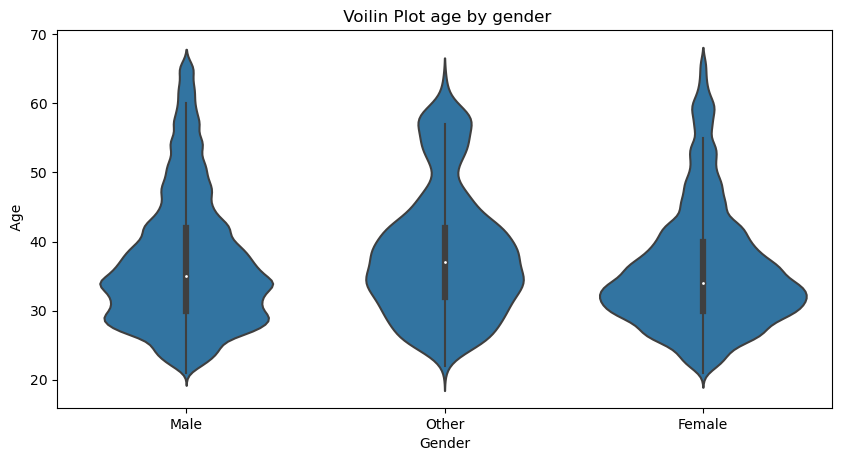

In [45]:
# plotting violin
plt.figure(figsize = (10,5), dpi = 100)
base_color = sns.color_palette()[0]
sns.violinplot(data=ford_go_bike, x='member_gender', y='Age', color=base_color, innner=None);
label("Gender"," Age"," Voilin Plot age by gender")

In [46]:
ford_go_bike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_share_for_all_trip,year,month,day,start_time_hour,end_time_hour,age_group,Age,duration_min,age_group_cat
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,No,2019,February,Thu,17,8,midlife,38,869.750000,2
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,No,2019,February,Thu,12,5,midlife,50,1030.900000,2
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,No,2019,February,Thu,17,4,old,33,608.166667,3
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,Yes,2019,February,Thu,23,0,midlife,48,26.416667,2
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,...,No,2019,February,Thu,23,0,young,63,29.883333,1


### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The user type Customers go on a longer trip than the user type Subscribers where the User Customer are more than Subscriber


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> The female distribution depending on their Age more than male

## Multivariate Exploration

> Creating plots of three or more variables to investigate the Ford Go Bike data even further

### What is the average trip duration variation in weekdays between customers and subscribers ?

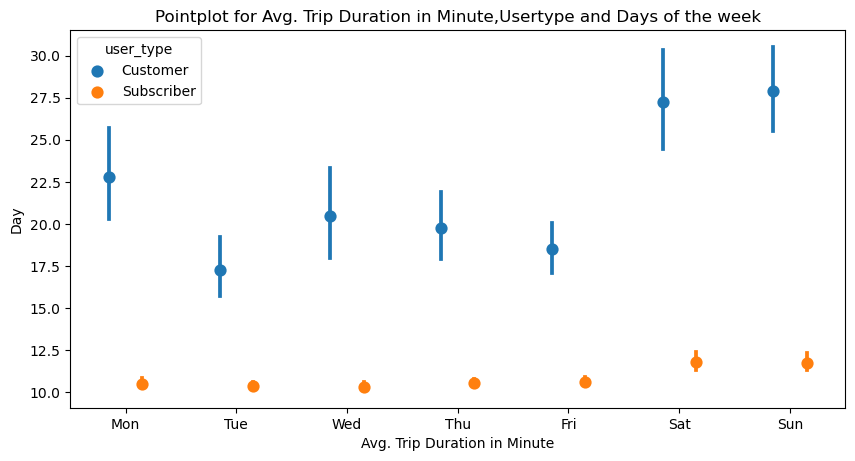

In [47]:
plt.figure(figsize = (10,5), dpi = 100)
sns.pointplot(data=ford_go_bike, x='day', y='duration_min', hue='user_type', dodge=0.3, linestyles="");
label("Avg. Trip Duration in Minute","Day","Pointplot for Avg. Trip Duration in Minute,Usertype and Days of the week");

>It can be seen from the above plot that subscribers ride much shorter/quicker trips compared to customers on each day of the week.

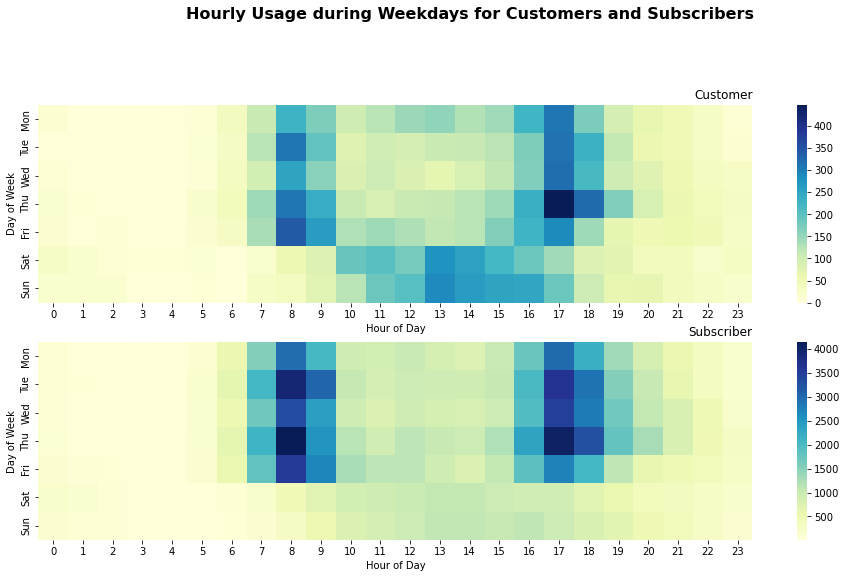

In [48]:
plt.figure(figsize = (16,8));
plt.subplot(2, 1, 1)
customers = ford_go_bike.query('user_type == "Customer"')
ct_counts = customers.groupby(['day', 'start_time_hour']).size()
ct_counts = ct_counts.reset_index(name='count')
ct_counts = ct_counts.pivot(index='day', columns='start_time_hour', values='count')
sns.heatmap(ct_counts, cmap='YlGnBu');
plt.title('Customer', loc='right');
plt.xlabel('Hour of Day');
plt.ylabel('Day of Week');


plt.suptitle('Hourly Usage during Weekdays for Customers and Subscribers', y=1.05, fontsize=16, fontweight='bold');

plt.subplot(2, 1, 2);
subscribers = ford_go_bike.query('user_type == "Subscriber"')
st_counts = subscribers.groupby(['day', 'start_time_hour']).size()
st_counts = st_counts.reset_index(name='count')
st_counts = st_counts.pivot(index='day', columns='start_time_hour', values='count')
sns.heatmap(st_counts, cmap='YlGnBu');
plt.title('Subscriber', loc='right');
plt.xlabel('Hour of Day');
plt.ylabel('Day of Week');


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


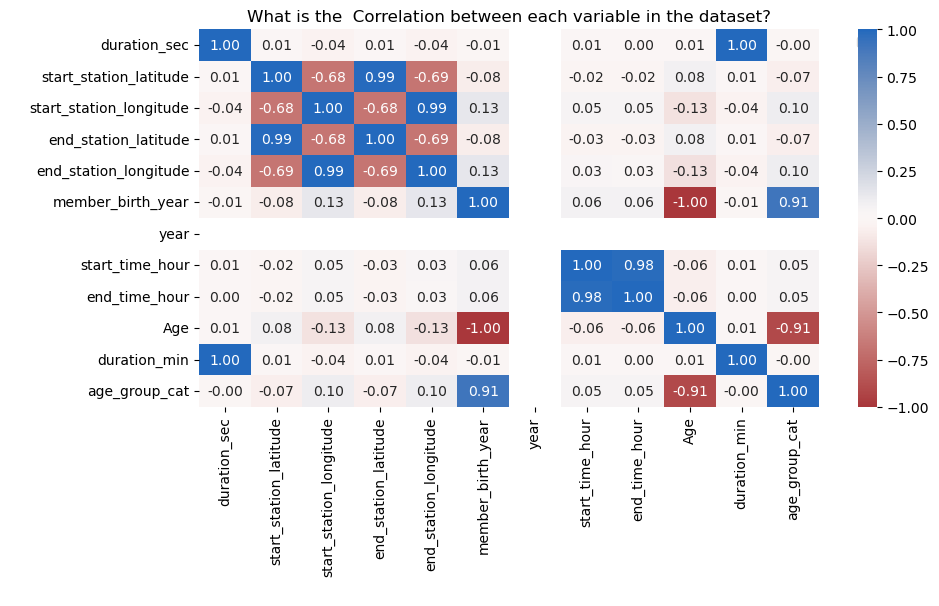

In [49]:
plt.figure(figsize = (10,5), dpi = 100)
sns.heatmap(ford_go_bike.corr(), annot = True, fmt = '.2f', cmap = 'vlag_r', center = 0)
plt.xticks(rotation = 90)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
label(" "," ","What is the  Correlation between each variable in the dataset?");

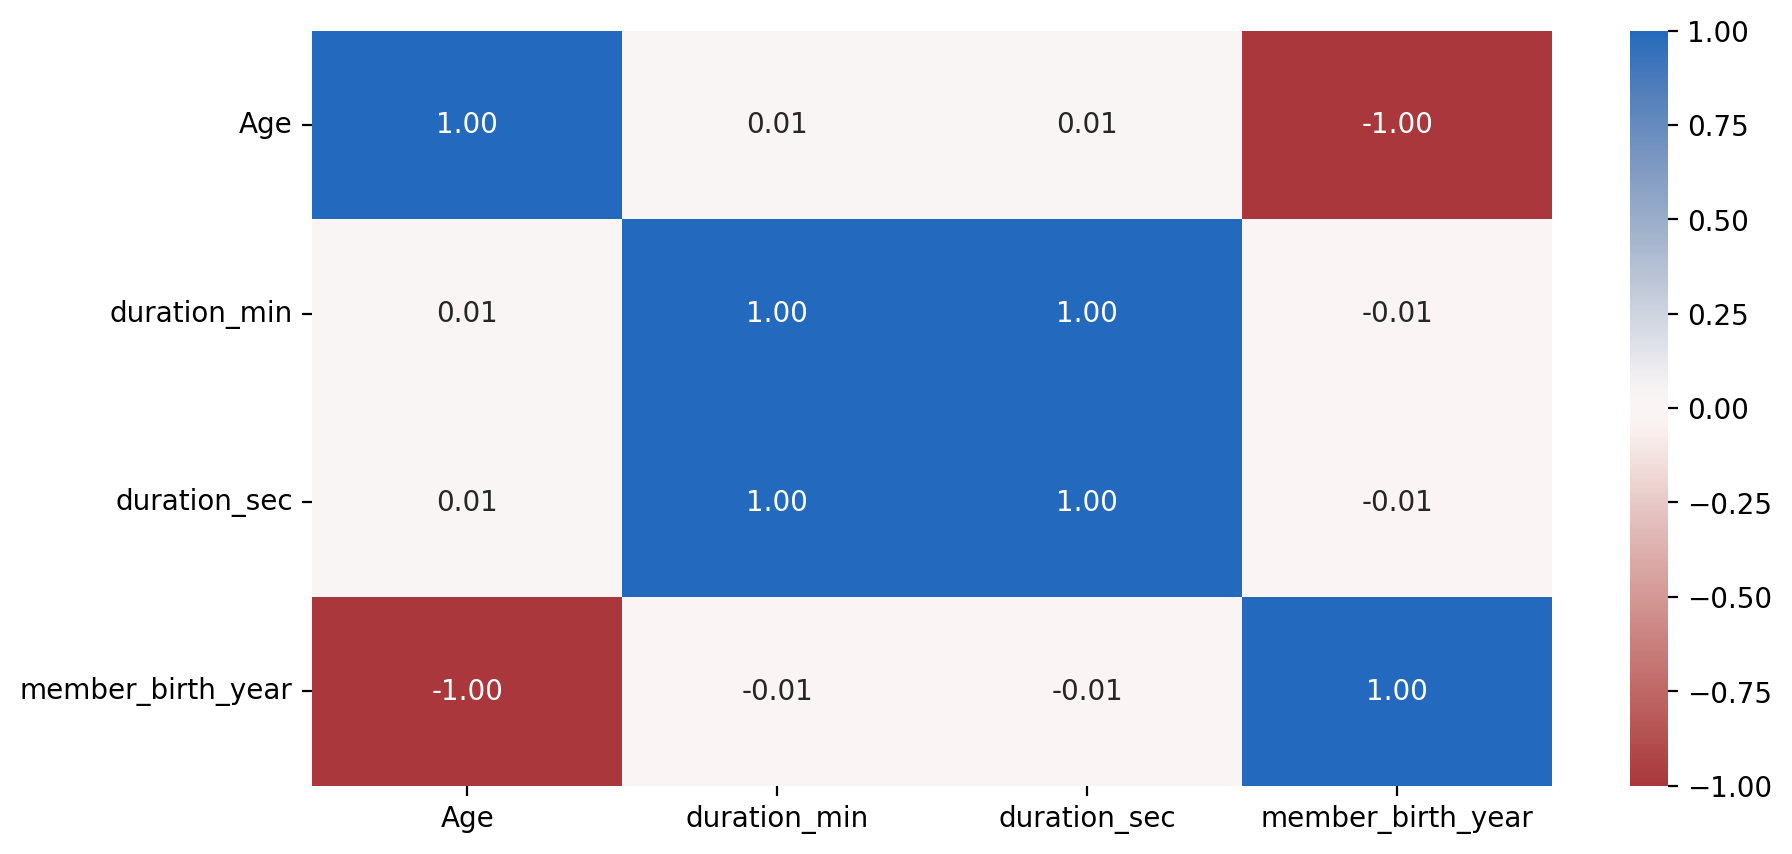

In [50]:
plt.figure(figsize = (10,5), dpi = 200)
data_stat = ['Age', 'duration_min',"duration_sec", "member_birth_year", "bike_id"]
sns.heatmap(ford_go_bike[data_stat].corr(), annot = True, fmt = '.2f', cmap = 'vlag_r', center = 0);

Actually the heat map display the above ideas in clear percentages
<ul>
<li>There is no Correlation for any variable with time ( duration sec /minutes)</li>
<li>There is a negative  Correlation between member_birth_year and age which normal.</li>
<li>There is no significant Correlation for any variable with bike_id.</li>
 </ul>

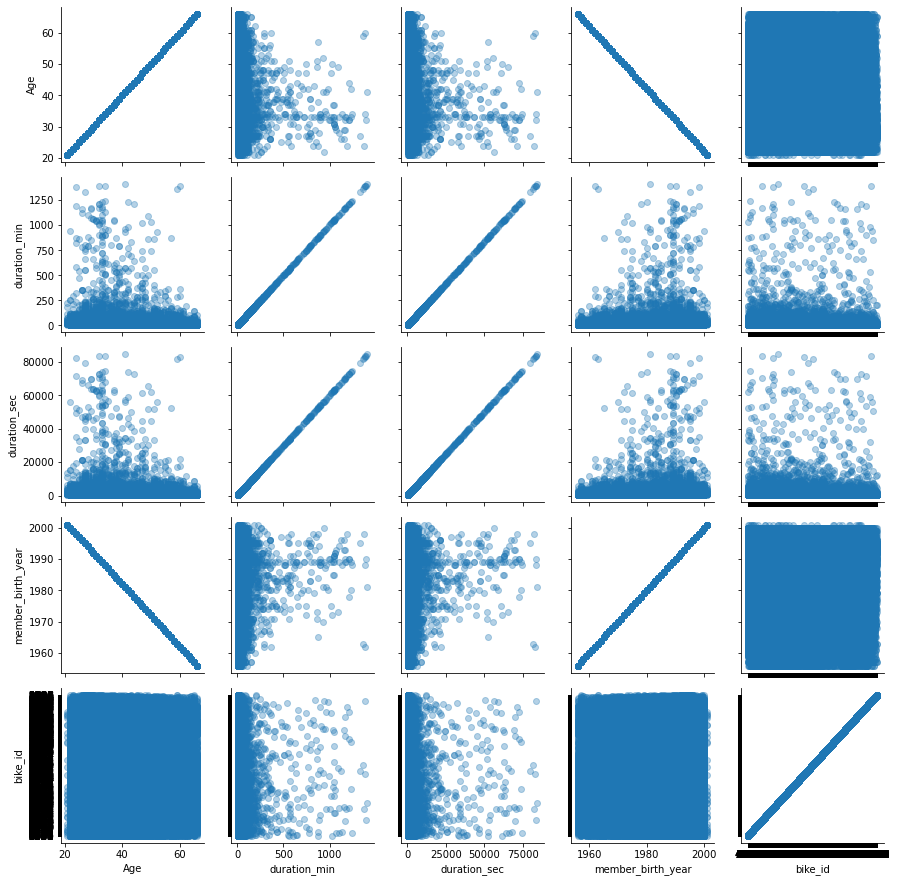

In [51]:
data_stat = ['Age', 'duration_min',"duration_sec", "member_birth_year", "bike_id"]
g = sns.PairGrid(data =ford_go_bike , vars = data_stat ) ;
g.map(plt.scatter, alpha = 1/3)

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

<ul>
<li>There is no Correlation for any variable with time ( duration sec /minutes/hours)</li>
<li>There is a weak Correlation between start_station_id with start_station_longitude and end_station_longitude , so we can say that the station location is good factor and we may study in my Market campaign.</li>
<li>There is a strong Correlation between start station longitude and end_station longitude, so we can say that the station location we have to study in my Market campaign.</li>
</ul>

### Were there any interesting or surprising interactions between features?

> There is no Correlation for any variable with time ( duration sec /minutes/hours) 

## Conclusions
<ul>
<li>Most users were Male.</li>
<li>Most users were subscriber.</li>
<li>The distribution of duration was strange as the minutes and the hour charts were 30 minutes or less for most users.</li>
<li>The female distribution depending on their Age more than male.</li>
<li>The customers use the bikes for longer periods than subscribers even though the subscribers are much highr in terms of numbers having the sunday and satuarday the most usage days which are the weekends.</li>
</ul>

## Limitation
<ul>
<li>We got missing data which we fix some of them.</li>
<li>Face some challenges while i was typing to incoporate the Age group colume in the __subplot__. </li>
<li>Finding it difficult using fillna function on some colunms during the cleaning process.</li>
</ul>

In [52]:
ford_go_bike.to_csv('cleaned_ford_go_bike.csv',index=False)